## Importing modules and functions

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics 
from sklearn import cross_validation, metrics 
from matplotlib import pyplot as plt
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV   

C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df=pd.read_csv('C:\\Users\\sabhila1\\Documents\\Titanic ML Problem\\all\\train.csv')

In [4]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
X = df.copy()

In [6]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
X.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X.drop(['Name'], axis = 1, inplace = True)  ## 891 UNIQUE VALUES
X.drop(['PassengerId'], axis = 1, inplace = True)  ## 891 UNIQUE VALUES
X.drop(['Ticket'], axis = 1, inplace = True)    ## 687 UNIQUE VALUES


In [9]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

In [10]:
str(X['Embarked'].mode()[0])

'S'

In [11]:
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [12]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
X.drop(['Cabin'], axis = 1, inplace = True)

In [14]:
X.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [16]:
X1 = X.copy()
del X1['Survived']
y = X['Survived']

In [18]:
X.to_pickle('cat_Indep')

In [16]:
le = preprocessing.LabelEncoder()
X1['Embarked'] = le.fit_transform(X1['Embarked'])

In [17]:
X1['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [18]:
X1['Sex'] = le.fit_transform(X1['Sex'])

In [19]:
X1['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [20]:
X1['Embarked'] = X1['Embarked'].astype('category')

In [21]:
X1['Sex'] = X1['Sex'].astype('category')

In [22]:
X1.dtypes

Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [26]:
y = pd.DataFrame(y)

In [27]:
X1.to_pickle('IndependentVar')
y.to_pickle('TargetVariable')

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

In [120]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
y_predict=clf.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy  ## TRAINING ACCURACY

0.9820359281437125

In [122]:
test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test , test_predict)
accuracy

0.7354260089686099

In [127]:
importances = clf.feature_importances_
dict(zip(X1.columns, importances))

{'Pclass': 0.11328965794073904,
 'Sex': 0.3068641338683485,
 'Age': 0.23964430904741793,
 'SibSp': 0.05533474161607968,
 'Parch': 0.024632045262642514,
 'Fare': 0.2266530974402705,
 'Embarked': 0.033582014824501814}

In [129]:
X1.drop(['SibSp'], axis = 1, inplace = True)  
X1.drop(['Parch'], axis = 1, inplace = True)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

In [151]:
clf = DecisionTreeClassifier(min_samples_leaf=15,max_depth=4,min_samples_split=40)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
y_predict=clf.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy  ## TRAINING ACCURACY

0.8263473053892215

In [153]:
test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test , test_predict)
accuracy

0.8026905829596412

In [ ]:
## Random Forest Classifier

In [394]:
rf = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=8, min_samples_leaf=5, min_samples_split= 50)
rf.fit(X_train,y_train)
y_predict=rf.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy

0.8413173652694611

In [395]:
y_predict=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8161434977578476

In [393]:
param_test = {'min_samples_leaf': [5,8,10,12,15,20,30,40] , 'max_depth': [3,4,6,8,10] , 'min_samples_split': [20,25,30,35,40,45,50,60],'n_estimators':[50,60,70,100,120]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(random_state=10),param_grid = param_test, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.85111, std: 0.03992, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20},
  mean: 0.85120, std: 0.03997, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 25},
  mean: 0.85061, std: 0.04034, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 30},
  mean: 0.85072, std: 0.04129, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 35},
  mean: 0.85122, std: 0.04098, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 40},
  mean: 0.85109, std: 0.04107, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 45},
  mean: 0.85081, std: 0.04036, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 50},
  mean: 0.84821, std: 0.04133, params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 60},
  mean: 0.84888, std: 0.03987, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20},
  mean: 0.84941, std: 0.03992, params: {'max_depth': 3,

In [ ]:
## GBM

In [316]:
gbm0 = GradientBoostingClassifier(random_state=10,learning_rate=0.25,min_samples_leaf=20, max_features='sqrt')
gbm0.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [317]:
y_predict=gbm0.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy

0.9011976047904192

In [318]:
y_predict=gbm0.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8161434977578476

In [319]:
pred = gbm0.predict_proba(X_train)[:,1]
metrics.roc_auc_score(y_train, pred)

0.9533263488737559

In [320]:
pred = gbm0.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, pred)

0.8764883447928895

Text(0,0.5,'Feature Importance Score')

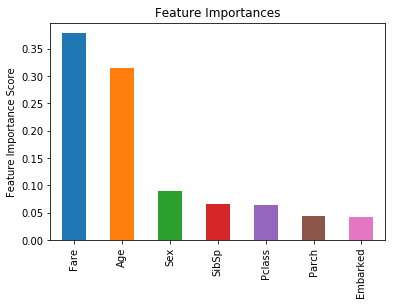

In [321]:
feat_imp = pd.Series(gbm0.feature_importances_, X1.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [323]:
del X1['Parch']
del X1['Embarked']

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

In [401]:
gbm0 = GradientBoostingClassifier(random_state=10,learning_rate=0.1,min_samples_leaf=8, 
                                  max_features='sqrt', min_samples_split=30,max_depth=5, n_estimators=50,subsample=0.5)
gbm0.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=30,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=0.5, verbose=0,
              warm_start=False)

In [402]:
y_predict=gbm0.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy

0.875748502994012

In [403]:
y_predict=gbm0.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8475336322869955

In [404]:
pred = gbm0.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, pred)

0.8841606573872212

In [398]:
import time

In [399]:
t1 = time.time()
param_test = {'n_estimators':[50,70,100],'min_samples_leaf': [8,15,30] , 'max_depth': [3,5,7] , 'min_samples_split': [20,30,40,50],'subsample':[0.3,0.5,0.7]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', random_state=10),param_grid = param_test, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train,y_train)
t2 = time.time()
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.85678, std: 0.03623, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50, 'subsample': 0.3},
  mean: 0.86361, std: 0.03611, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50, 'subsample': 0.5},
  mean: 0.86317, std: 0.03694, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50, 'subsample': 0.7},
  mean: 0.85403, std: 0.03381, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 70, 'subsample': 0.3},
  mean: 0.85783, std: 0.02819, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 70, 'subsample': 0.5},
  mean: 0.86549, std: 0.03195, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 70, 'subsample': 0.7},
  mean: 0.85704, std: 0.03325, params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.3}

In [400]:
(t2-t1)/60

1.579553739229838

In [ ]:
## Without dropping cabin 

In [100]:
X = df.copy()
X.drop(['Name'], axis = 1, inplace = True)  ## 891 UNIQUE VALUES
X.drop(['PassengerId'], axis = 1, inplace = True)  ## 891 UNIQUE VALUES
X.drop(['Ticket'], axis = 1, inplace = True)    ## 687 UNIQUE VALUES


In [101]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [21]:
pd.get_dummies(X['Cabin'])

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X = pd.concat([X, pd.get_dummies(X['Cabin'])], axis=1)

In [106]:
del X['Cabin']

In [108]:
X1 = X.copy()
del X1['Survived']
y = X['Survived']

In [109]:
le = preprocessing.LabelEncoder()
X1['Embarked'] = le.fit_transform(X1['Embarked'])
X1['Sex'] = le.fit_transform(X1['Sex'])

In [110]:
X1['Embarked'] = X1['Embarked'].astype('category')
X1['Sex'] = X1['Sex'].astype('category')

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

In [118]:
clf = DecisionTreeClassifier(min_samples_leaf=15,max_depth=4,min_samples_split=40)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
y_predict=clf.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy  ## TRAINING ACCURACY

0.8263473053892215

In [120]:
test_predict=clf.predict(X_test)
accuracy = accuracy_score(y_test, test_predict)
accuracy  

0.8026905829596412

In [122]:
importances = clf.feature_importances_
dict(zip(X_train.columns, importances))

{'Pclass': 0.21169682439080487,
 'Sex': 0.6193954828836898,
 'Age': 0.08748667549794831,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Fare': 0.05870408712788528,
 'Embarked': 0.022716930099671757,
 'A10': 0.0,
 'A14': 0.0,
 'A16': 0.0,
 'A19': 0.0,
 'A20': 0.0,
 'A23': 0.0,
 'A24': 0.0,
 'A26': 0.0,
 'A31': 0.0,
 'A32': 0.0,
 'A34': 0.0,
 'A36': 0.0,
 'A5': 0.0,
 'A6': 0.0,
 'A7': 0.0,
 'B101': 0.0,
 'B102': 0.0,
 'B18': 0.0,
 'B19': 0.0,
 'B20': 0.0,
 'B22': 0.0,
 'B28': 0.0,
 'B3': 0.0,
 'B30': 0.0,
 'B35': 0.0,
 'B37': 0.0,
 'B38': 0.0,
 'B39': 0.0,
 'B4': 0.0,
 'B41': 0.0,
 'B42': 0.0,
 'B49': 0.0,
 'B5': 0.0,
 'B50': 0.0,
 'B51 B53 B55': 0.0,
 'B57 B59 B63 B66': 0.0,
 'B58 B60': 0.0,
 'B69': 0.0,
 'B71': 0.0,
 'B73': 0.0,
 'B77': 0.0,
 'B78': 0.0,
 'B79': 0.0,
 'B80': 0.0,
 'B82 B84': 0.0,
 'B86': 0.0,
 'B94': 0.0,
 'B96 B98': 0.0,
 'C101': 0.0,
 'C103': 0.0,
 'C104': 0.0,
 'C106': 0.0,
 'C110': 0.0,
 'C111': 0.0,
 'C118': 0.0,
 'C123': 0.0,
 'C124': 0.0,
 'C125': 0.0,
 'C126': 0.0,
 'C128': 0

Practical scenario of overfitting

In [50]:
X2 = X1.loc[:9]

In [56]:
y2 = y[0:10]

In [75]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
20,2,1,35.000000,0,0,26.0000,2
21,2,1,34.000000,0,0,13.0000,2
22,3,0,15.000000,0,0,8.0292,1
23,1,1,28.000000,0,0,35.5000,2
24,3,0,8.000000,3,1,21.0750,2
25,3,0,38.000000,1,5,31.3875,2
26,3,1,29.699118,0,0,7.2250,0
27,1,1,19.000000,3,2,263.0000,2
28,3,0,29.699118,0,0,7.8792,1
29,3,1,29.699118,0,0,7.8958,2


In [76]:
y_test

20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
      ..
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
Name: Survived, Length: 100, dtype: int64

In [74]:
X_test = X1.loc[20:119]


In [71]:
y_test = y[20:120]

In [59]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X2,y2)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_predict=rf.predict(X2)
accuracy = accuracy_score(y2, y_predict)
accuracy

1.0

In [77]:
y_predict=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.78

In [62]:
rf.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)